In [99]:
import pytesseract
from pytesseract import Output
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
img = cv2.imread('itens/images/placa_carro1.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, lim_otsu = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [101]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# * Nessa função do openCV, passamos o formato do Kernel a ser construído e o tamanho dele

## First -> **Erosion**
-    reduz a região branca da figura, eliminando ruídos e preenchendo com pixels escuros.

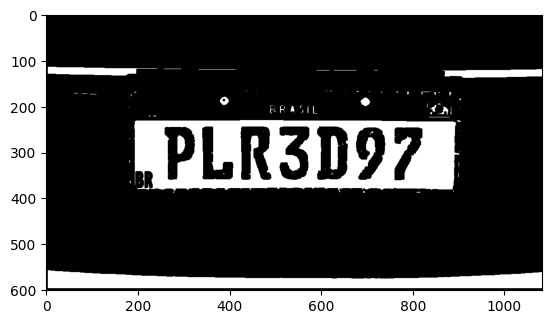

In [102]:
erosion = cv2.erode(lim_otsu, kernel)

plt.imshow(erosion, cmap='gray')

## Second -> **Dilation**
-   expande a região branca da figura, eliminando ruídos escuros e preenchendo com pixels brancos.

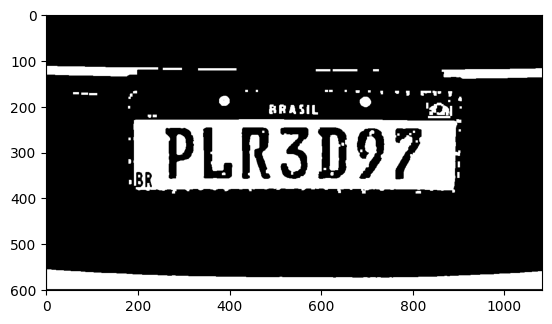

In [103]:
dilation = cv2.dilate(erosion, kernel)
plt.imshow(dilation, cmap='gray')

# **Kernel** ➝ O que é?

O kernel ou elemento estruturante é uma matriz de valores que servem como uma máscara para a imagem, e a partir dessa máscara podem ser feitas transformações de acordo com certas condições. O kernel pode possuir diferentes formatos bem como diferentes dimensões, de modo que cada uma dessas escolhas reflete em como a transformação na imagem será realizada.


### Possui os seguintes formatos:
-   retangular
-   elíptico
-   em cruz



## Third ➝ Opening
-   Just another name for erosion followed by dilation 
-   Useful for noise removal
-   Utilized function -> cv.morphologyEx()

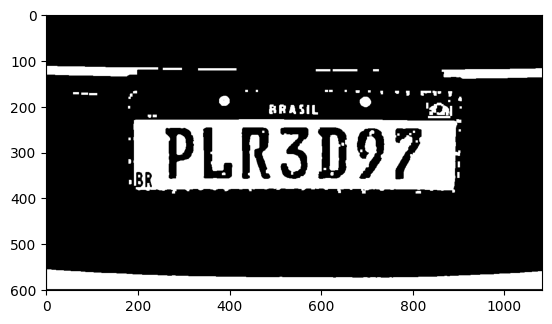

In [104]:
# * Opening é a operação de Erosão seguida de Dilatação
opening = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

## **Fourth** ➝ Closing
-   Opposite of opening
-   Useful for closing small holes in objects in first plane or small black points on the object


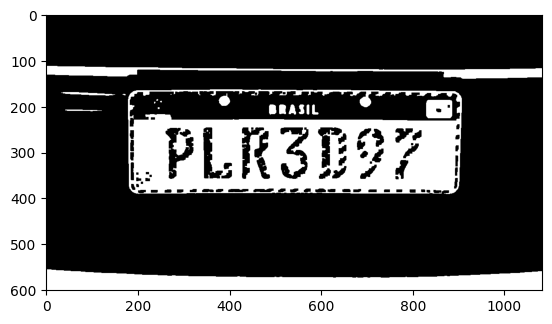

In [105]:
# * Closing é a operação de Dilatação seguida de Erosão
closing = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

## **Fifth** ➝ Morphological Gradient
-   Diference between dilation and erosion of an image
-   The result will be similar to the object's outline

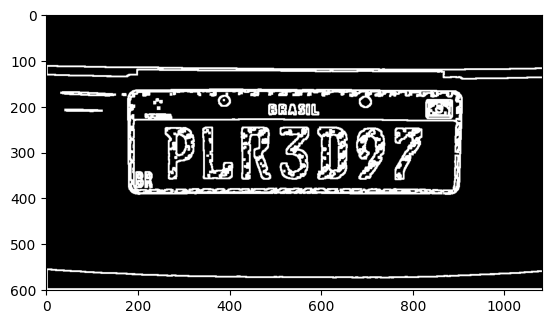

In [106]:
gradient = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap='gray')

## **Sixth** ➝ Top Hat
-   Diference between input image and Opening of the image

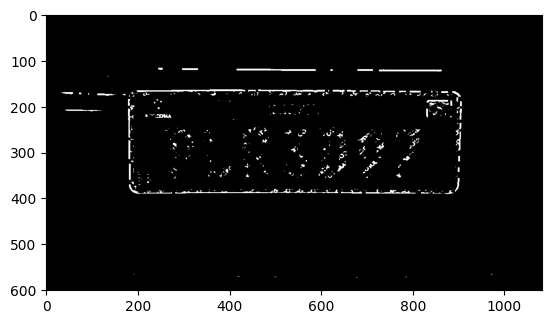

In [107]:
top_hat = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
plt.imshow(top_hat, cmap='gray')

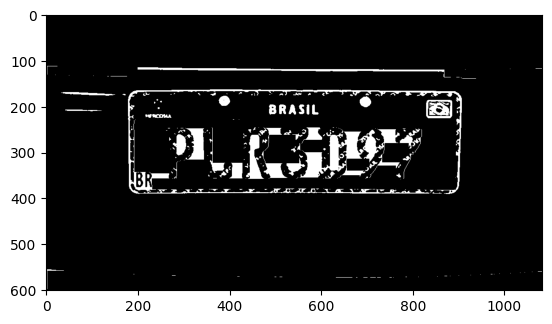

In [108]:
# * Using TOP HAT with a retangular kernel (40, 13)
retangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
top_hat_retangular = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, retangular_kernel)
plt.imshow(top_hat_retangular, cmap='gray')

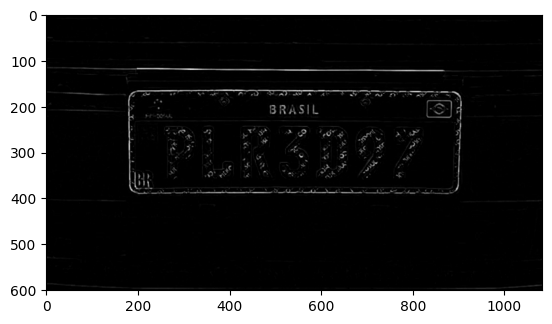

In [109]:
top_hat = cv2.morphologyEx(imgGray, cv2.MORPH_TOPHAT, kernel)
plt.imshow(top_hat, cmap='gray')

## **Seventh** ➝ Black Hat
-   Diference between the closing of the input image and input image.

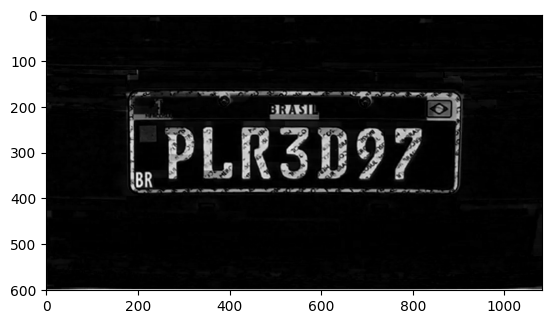

In [110]:
# * Best for this image
black_hat = cv2.morphologyEx(imgGray, cv2.MORPH_BLACKHAT, retangular_kernel)
plt.imshow(black_hat, cmap='gray')

# Testing

In [111]:
# ! Erosion
config_tesseract = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" psm 6'
text = pytesseract.image_to_string(erosion, config=config_tesseract)
print(text)

Le oe as a

BRASIL

TPLR3D97 |



# TOPICS 
-    Identificar ruídos na imagem;
-   Diferenciar os diferentes tipos de transformações morfológicas existentes;
-   Descrever os objetivos de cada transformação morfológica;
-   Selecionar o melhor tipo de transformação de acordo com o contexto;
-   Aplicar transformações morfológicas em imagens limiarizadas e em escala de cinza.